In [1]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
muta = pd.read_csv("Mutagen_Num.CSV")

In [3]:
muta.drop(columns=['Name'])

,ind1,inda,logp,lumo,status
0,1.0,0.0,3.81,-1.208,active
1,1.0,0.0,3.4,-1.764,active
2,1.0,0.0,6.07,-2.284,active
3,1.0,0.0,3.43,-1.398,active
4,0.0,0.0,2.17,-2.072,active
...,...,...,...,...,...
183,0.0,0.0,3.77,-1.228,inactive
184,0.0,0.0,1.73,-0.93,inactive
185,0.0,0.0,2.74,-1.562,inactive
186,0.0,0.0,1.64,-0.982,inactive


In [4]:

le = LabelEncoder()
muta['status']=le.fit_transform(muta['status'])

Text(0.5, 1.0, 'target Class')

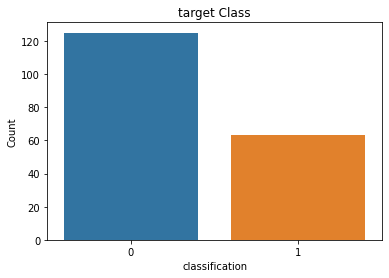

In [5]:
import seaborn as sns
sns.countplot(x='status',data=muta)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

In [6]:
x = muta
y = x['status']
x=x.drop(columns=['status','Name'])

In [7]:
ffff =  list(x.columns)
X_train, X_test, y_train, Y_test = train_test_split(x, y, random_state = 47, test_size = 0.25)
DTree = DecisionTreeClassifier(criterion = 'entropy')
DTree.fit(X_train, y_train)
y_pred =  DTree.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=DTree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=Y_test, y_pred=DTree.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.8085106382978723


In [8]:
r = export_text(DTree,feature_names=ffff)
print(r)

|--- ind1 <= 0.50
|   |--- lumo <= -2.13
|   |   |--- class: 0
|   |--- lumo >  -2.13
|   |   |--- logp <= 2.04
|   |   |   |--- lumo <= -1.86
|   |   |   |   |--- lumo <= -2.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- lumo >  -2.01
|   |   |   |   |   |--- class: 0
|   |   |   |--- lumo >  -1.86
|   |   |   |   |--- lumo <= -1.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- lumo >  -1.25
|   |   |   |   |   |--- lumo <= -1.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lumo >  -1.20
|   |   |   |   |   |   |--- class: 1
|   |   |--- logp >  2.04
|   |   |   |--- lumo <= -1.07
|   |   |   |   |--- logp <= 2.63
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- logp >  2.63
|   |   |   |   |   |--- lumo <= -1.88
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- lumo >  -1.88
|   |   |   |   |   |   |--- lumo <= -1.61
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lumo >  -1.61
|   |   |   |   |   |   |  

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)

print("Naive Bayes score: ",nb.score(X_train, y_train))

y_pred = nb.predict(X_test)

#Accuracy score for test data

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

Naive Bayes score:  0.8439716312056738


0.851063829787234

In [10]:
# compare algorithms
from  PyILP.PyILP import *
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import LabelEncoder
#from sklearn import  svm
#from sklearn.cluster import KMeans
#from sklearn import datasets
import pandas as pd
import numpy as np
import os
import collections
import pickle
from pyswip import Prolog, Variable, Functor



['active(A) :-   atm(A,B,h,3,C), C=0.144.', 'active(A) :-   ind1(A,1.0).', 'active(A) :-   atm(A,B,o,40,C), C= -0.383.', 'active(A) :-   atm(A,B,c,29,C), C=0.01.', 'active(A) :-   atm(A,B,c,16,C), C= -0.191.', 'active(d145).', 'active(A) :-   atm(A,B,c,27,C), C=0.012.', 'active(d172).', 'active(d37).', 'active(d146).']
+----------+ Testing +----------+
+---------------------+------------------+------------------+
|       n = 38        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 21               | 2                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 4                | 11               |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accuracy    | 0.842 |
+-------------+-------+
| Precision   | 0.913 |
+-------------+-------+
| Sensitivity | 0.840 |
+-------------+--

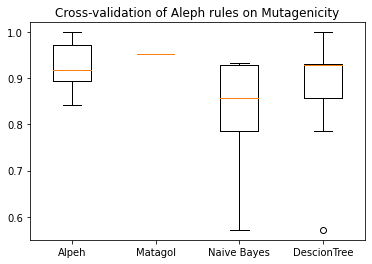

Text(0, 0.5, 'Learning time (Sec)')

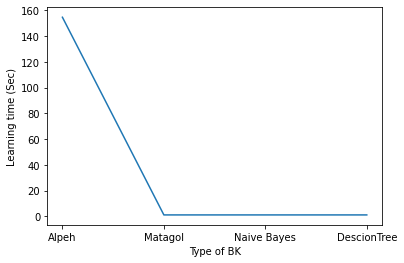

In [11]:
models = []
BK_3 = 'b_3.pl'
BK_4 ="b_33.pl"




models.append(('Aleph',"Alpeh", BK_3))
models.append(('Metagol',"Matagol", BK_3))
models.append(('Naive Bayes',"Naive Bayes" ,GaussianNB()))
models.append(('Decision Tree', "DescionTree" ,DecisionTreeClassifier()))

#print('****************  Mutagenicity Dataset ****************')
#pos, neg= aleph_pos_neg(pos_ex, neg_ex)
results1 = []
names1 = []
avg_time = []
for name, label, model in models:
    print("\n")
    #print("****************** Rule sets generated by Aleph for the Mutagenicity Dataset using BK:  ", label)
    if name=="Aleph":
        #continue 
        # can be changed to 10 fold which will take longer to finish
        model_1=aleph_cross_validation(model,  CV=5,  positive_example="pos_example_m.f", 
                                       negative_example="neg_example_m.n")
        cv_results=model_1.accuracy
    elif name=="Metagol":
        #continue
        model_1=metagol_learn(model, positive_example="pos_example_m.f", 
                                       negative_example="neg_example_m.n")
        cv_results=model_1.accuracy       
    else:
        kfold = StratifiedKFold(n_splits=10, random_state=None)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results1.append(cv_results)
    avg_time.append(model_1.time_learn)
    names1.append(label)
    print("\n")
pyplot.boxplot(results1, labels=names1)
pyplot.title('Cross-validation of Aleph rules on Mutagenicity')
pyplot.show()

pyplot.plot(names1,avg_time)
pyplot.xlabel("Type of BK")
pyplot.ylabel("Learning time (Sec)")